In [1]:
import yaml
import os
import pandas as pd
import numpy as np
from torch.utils.data import DataLoader
import torch

with open('config.yml', 'r') as file:
    config = yaml.safe_load(file)

from data_pipeline import DefogDataset
from nn_models import RNN
from nn_models import train_model
from nn_models import score_model

from sklearn.metrics import average_precision_score

from sklearn.model_selection import train_test_split

In [2]:
if torch.cuda.is_available():
    DEVICE = torch.device('cuda') 
else:
    DEVICE = torch.device('cpu') 
DEVICE

device(type='cuda')

In [3]:
training_data = DefogDataset()
training_loader = DataLoader(training_data, batch_size=1, shuffle=True)

model = RNN(5,5)
model.to(DEVICE)

RNN(
  (rnn): RNN(3, 5, num_layers=5)
  (linear): Linear(in_features=5, out_features=4, bias=True)
)

In [4]:
losses, scores = train_model(model, training_loader,
            epochs = 4,
            verbose = 1,
            )

epoch 0


  8%|▊         | 63/833 [01:50<22:25,  1.75s/it]  


KeyboardInterrupt: 

# Plotting Loss

In [ ]:
import matplotlib.pyplot as plt

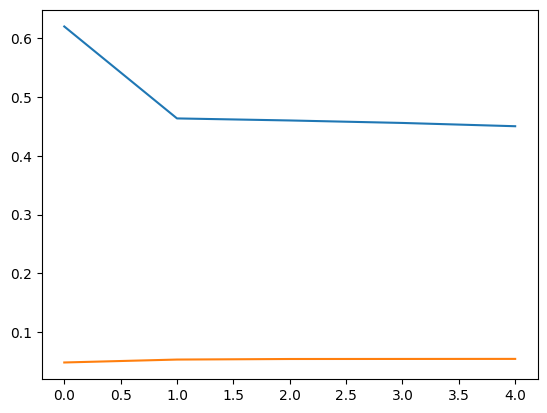

In [ ]:
epochs = list(range(len(losses)))
plt.plot(epochs, losses, label='training loss')
plt.plot(epochs, scores, label='training avg precision')
plt.legend()

# Running Predictions

In [ ]:
score_model(model, training_loader)

 56%|███████████████████████████████▊                         | 464/833 [04:15<02:08,  2.86it/s]

# Saving Model

In [5]:
torch.save(model, './models/test_model.pth')

# Loading Model

In [6]:
model = torch.load('./models/test_model.pth')
    
model.eval()

RNN(
  (rnn): RNN(3, 5, num_layers=5)
  (linear): Linear(in_features=5, out_features=4, bias=True)
)

# Scratchwork

In [2]:
with open('config.yml', 'r') as file:
    config = yaml.safe_load(file)

In [3]:
os.listdir(config['data_path'])

['train',
 'daily_metadata.csv',
 'unlabeled',
 'tdcsfog_metadata.csv',
 '.disk',
 'sample_submission.csv',
 'test',
 'tasks.csv',
 'events.csv',
 'defog_metadata.csv',
 '.Trash-1000',
 'subjects.csv']